# Combine DIC data with X-ray in order to calculate multiaxial flow curve

- Use pylab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Dependents

In [2]:
import os
from glob import glob
from RS import analyze_proto
import matplotlib as mpl
import time
from MP import progress_bar, lib
mpl_lib=lib.mpl_lib
uet=progress_bar.update_elapsed_time
GS=mpl.gridspec.GridSpec

- Name of DIC files

In [3]:
date='20141028'
path='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/'
fn_DIC=os.path.join(path,date,'DIC/DIC_results.txt')
dic_dat=np.loadtxt(fn_DIC,skiprows=1).T

# Read lab note book in order to match Xray file and DIC index

In [4]:
print os.popen('ls -ls %s'%os.path.join(path,date,'Xray')).read()

total 320
8 -rw-------  1 yj  admin  1472 Mar 30 15:34 28OCT14_0003Data.txt
8 -rw-------  1 yj  admin  3009 Mar 30 15:34 28OCT14_0003Data1Phi-135.txt
8 -rw-------  1 yj  admin  2998 Mar 30 15:34 28OCT14_0003Data2Phi-45.txt
8 -rw-------  1 yj  admin  3007 Mar 30 15:34 28OCT14_0003Data3Phi0.txt
8 -rw-------  1 yj  admin  3008 Mar 30 15:34 28OCT14_0003Data4Phi90.txt
8 -rw-------  1 yj  admin  1475 Mar 30 15:34 28OCT14_0005Data.txt
8 -rw-------  1 yj  admin  3011 Mar 30 15:34 28OCT14_0005Data1Phi-135.txt
8 -rw-------  1 yj  admin  3010 Mar 30 15:34 28OCT14_0005Data2Phi-45.txt
8 -rw-------  1 yj  admin  3008 Mar 30 15:34 28OCT14_0005Data3Phi0.txt
8 -rw-------  1 yj  admin  3009 Mar 30 15:33 28OCT14_0005Data4Phi90.txt
8 -rw-------  1 yj  admin  1475 Mar 30 15:33 28OCT14_0006Data.txt
8 -rw-------  1 yj  admin  3011 Mar 30 15:33 28OCT14_0006Data1Phi-135.txt
8 -rw-------  1 yj  admin  3010 Mar 30 15:35 28OCT14_0006Data2Phi-45.txt
8 -rw-------  1 yj  admin  3008 Mar 30 15:35 28OCT14_0006Data3Phi

- Making a fref file for Proto data analysis

In [5]:
# ------------------------------------------------------------------------
# Find suitable experimental stress factor file
#fn_sff='/Users/yj/GoogleDrive/expdat/Marciniak-X-ray-IF/YJ_BB_10times.sff'
fn_sff='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/YJ_BB_10times.sff'

# ------------------------------------------------------------------------
# Refer to Laboratory notebook to match up the X-ray data filename 
# and DIC image number
DIC_XRD="""#11  28OCT14_0006.tr
#12  28OCT14_0006.tr
#13  28OCT14_0007.tr
#14  28OCT14_0007.tr
#15  28OCT14_0008.tr
#16  28OCT14_0008.tr
#17  28OCT14_0009.tr
#18  28OCT14_0009.tr
#19  28OCT14_0010.tr
#20  28OCT14_0010.tr
#21  28OCT14_0011.tr
#22  28OCT14_0011.tr"""

# ------------------------------------------------------------------------

fn_fref=fn_DIC.split('DIC')[0]+'f_fref.txt'
f_fref=open(fn_fref,'w')

f_fref.write(fn_sff)
f_fref.write('  MajorStrainColumn: 2\n')
f_fref.write('%14s %12s %12s %12s %12s %5s\n'%('filename','Exx','Eyy','Exy','Ezz','DIC'))
lines=DIC_XRD.split('\n')
inds = []; fns = []
for line in lines:
    ind,fn=line.split()
    ind=int(ind.split('#')[-1])
    fn = fn.split('.tr')[0]
    inds.append(ind); fns.append(fn)
    
    col = dic_dat[0]
    ix=np.where(col==ind)[0]
    i = int(col[ix][0]) ## dic index
    # print ix,i

    exx = dic_dat[5][ix]
    eyy = dic_dat[7][ix]
    exy = dic_dat[9][ix]
    ezz = -exx-eyy    
    f_fref.write(('%14s '+'%+11.5e '*4+'%5i \n')%(fn, exx, eyy, exy, ezz,i))

f_fref.close()
print '-----------------------------------------------------------------------------------------------------'
print fn_fref, 'has been created:\n Use it for further stress analysis'
print '-----------------------------------------------------------------------------------------------------'

-----------------------------------------------------------------------------------------------------
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20141028/f_fref.txt has been created:
 Use it for further stress analysis
-----------------------------------------------------------------------------------------------------


In [6]:
print os.popen('cat %s'%os.path.join(path,date,'f_fref.txt')).read()

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/YJ_BB_10times.sff  MajorStrainColumn: 2
      filename          Exx          Eyy          Exy          Ezz   DIC
  28OCT14_0006 +3.66497e-02 +3.54856e-02 +1.89854e-04 -7.21353e-02    11 
  28OCT14_0006 +3.68092e-02 +3.55027e-02 +1.87518e-04 -7.23119e-02    12 
  28OCT14_0007 +1.69198e-01 +1.65514e-01 +7.77745e-04 -3.34712e-01    13 
  28OCT14_0007 +1.69202e-01 +1.65499e-01 +7.74217e-04 -3.34701e-01    14 
  28OCT14_0008 +2.30634e-01 +2.28732e-01 +7.20948e-04 -4.59366e-01    15 
  28OCT14_0008 +2.30711e-01 +2.28801e-01 +6.45355e-04 -4.59512e-01    16 
  28OCT14_0009 +2.88620e-01 +2.89979e-01 +5.13632e-04 -5.78599e-01    17 
  28OCT14_0009 +2.88590e-01 +2.90058e-01 +5.60363e-04 -5.78648e-01    18 
  28OCT14_0010 +3.44659e-01 +3.50673e-01 +2.62421e-04 -6.95332e-01    19 
  28OCT14_0010 +3.44806e-01 +3.50880e-01 +3.27218e-04 -6.95686e-01    20 
  28OCT14_0011 +3.71421e-01 +3.80288e-01 +1.35563e-04 -7.51709e-01    21 
  28OCT14_0011 +3.7

+ Running analyze_proto.main for the X-ray and DIC experiments to calculate
  stress/strain

In [7]:
## plastic strain of the points where the X-ray d-spacing
## were meausured are important information that is utilized over the X ray analysis.
## If, fc or fn_str are not given, the below application
## bases on the strain given in the fref file -
## the two major strain components are used with assumption
## that the sample was in 'equi-biaxial' strain.
t0=time.time()
RS=analyze_proto.main(path=os.path.join(path,date,'Xray'),
                   fn_sf=fn_sff,fref=os.path.join(path,date,'f_fref.txt'),
                   ind_plot=True)
uet(time.time()-t0)

---------------------------------------------
Strain information where SF/IG were measured
requires either fc or fn_str specified
If not the strain column in fn_sf is used,
subsequent analysis is performed by assuming
that the sample is in equibiaxial strain
---------------------------------------------


#-----------------------------------------------------#
 Interpolate SF and IG for matching with D-spacings
epsilon_vm:
[ 0.07213843  0.07231583  0.33471876  0.33470783  0.45936731  0.45951332
  0.57859953  0.57864862  0.69534067  0.69569484  0.75172643  0.75173438]
Strain reference at which sf was measured:
[ 0.    0.02  0.2   0.5   0.7 ]
  ** Phi angles of SF are different **
  ** Phi angles of IG are different **
#-----------------------------------------------------#
-----------------------------------
Standard deviation in d_ehkl at istp=0

phi:    -135      -45        0       90  avg
std: 1.5e-04  1.9e-04  1.2e-04  1.6e-04  1.6e-04 
Elapsed time:  19 [sec]

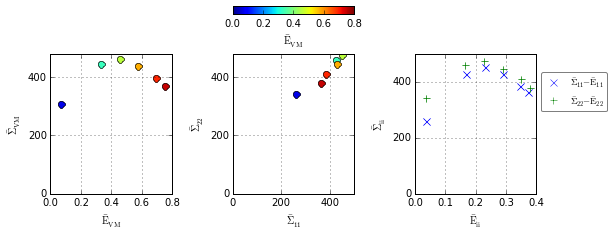

In [8]:
""" 
RS.EXP.flow.epsilon, RS.flow.sigma
"""
mn=0;mx=0.8
norm = mpl.colors.Normalize(vmin=mn,vmax=mx)
cmap, m = mpl_lib.norm_cmap(mn=mn,mx=mx)

fx=9
fy=fx*0.35
fig=plt.figure(figsize=(fx,fy))
gs=GS(20,3,wspace=0.5)
ax1=fig.add_subplot(gs[5:,0])
ax2=fig.add_subplot(gs[5:,1])
ax3=fig.add_subplot(gs[5:,2])

nstp = RS.EXP.flow.nstp


for istp in xrange(nstp):
    c=m.to_rgba(RS.EXP.flow.epsilon_vm[istp])
    ax2.plot(RS.flow.sigma[0,0][istp],RS.flow.sigma[1,1][istp],
             'o',mec='k',mfc=c)
    ax1.plot(RS.EXP.flow.epsilon_vm[istp],RS.flow.sigma_vm[istp],'o',c=c)
# ax2.plot(RS.flow.sigma[0,0],RS.flow.sigma[1,1],'k--')

ax3.plot(RS.EXP.flow.epsilon[0,0],RS.flow.sigma[0,0],'x',label=r'$\mathrm{\bar{\Sigma}_{11} - \bar{E}_{11}}$')
ax3.plot(RS.EXP.flow.epsilon[1,1],RS.flow.sigma[1,1],'+',label=r'$\mathrm{\bar{\Sigma}_{22} - \bar{E}_{22}}$')


for ax in fig.axes:
    ax.set_ylim(0.,);ax.set_xlim(0.,)
    ax.locator_params(nbins=4)
    ax.grid()

ax2.set_xlabel(r'$\mathrm{\bar{\Sigma}_{11}}$')
ax2.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$')
ax3.set_xlabel(r'$\mathrm{\bar{E}_{ii}}$')
ax3.set_ylabel(r'$\mathrm{\bar{\Sigma}_{ii}}$')
ax1.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
ax1.set_ylabel(r'$\mathrm{\bar{\Sigma}_{VM}}$')
ax3.legend(loc='best',fontsize=9,numpoints=1,bbox_to_anchor=(1,0.9))


axcb=fig.add_subplot(gs[0,1])
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,orientation='horizontal',
                          norm=norm,filled=True,format='%3.1f')
# axcb.locator_params(nbins=4)
axcb.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
cb.set_ticks(np.linspace(mn,mx,5))
#mpl_lib.add_cb(ax=axcb,cmap=cmap, filled=True,
#               format='%5.3f',norm=norm,
#               ylab=r'$\mathrm{\bar{E}_{VM}}$')


- Pickle the object 'RS' and save to a file

In [9]:
import cPickle as pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

fn = os.path.join(path,date,'RS.pck')
print fn
save_object(obj=RS, filename=fn)

fn = os.path.join('../../../pickles/RS_%s.pck'%date)
print os.path.join(os.getcwd(),fn)
save_object(obj=RS, filename=fn)

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20141028/RS.pck
/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/BB/../../../pickles/RS_20141028.pck
